In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_excel('flat_offers_domofond_1-300.xlsx')
df2=pd.read_excel('flat_offers_domofond_301-651.xlsx')
df1=df1.append(df2,ignore_index=True)

In [3]:
df1.dtypes

Адрес               object
Район               object
Материал            object
Этаж                 int64
Всего этажей         int64
Площадь            float64
Комнаты             object
Цена за кв.метр      int64
dtype: object

In [4]:
df1.drop(df1[df1.duplicated(keep='first')].index,inplace=True)
df1.index=[i for i in range(len(df1))]

Text(0, 0.5, '')

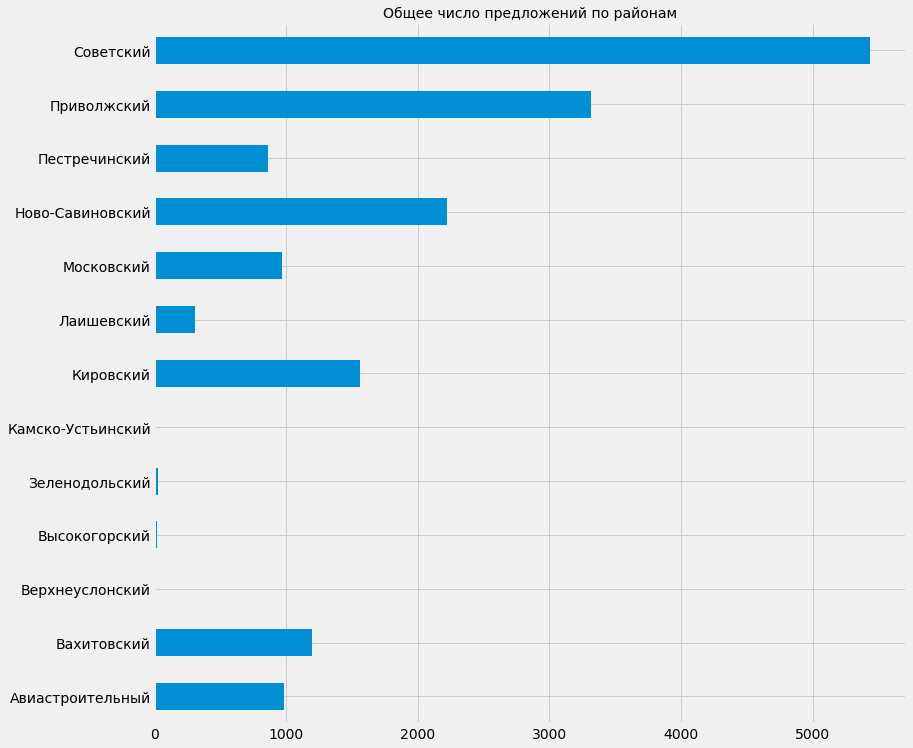

In [5]:
plt.style.use('fivethirtyeight')
df1.groupby('Район')['Адрес'].size().plot(kind='barh',figsize=(12,12),fontsize=14)
plt.title('Общее число предложений по районам',fontsize=14)
plt.ylabel('')

In [6]:
df_relevant=df1[df1['Район'].isin(df1.groupby('Район')['Адрес'].size().nlargest(9).index)]
list(set(df_relevant['Район']))

['Ново-Савиновский',
 'Приволжский',
 'Пестречинский',
 'Советский',
 'Вахитовский',
 'Авиастроительный',
 'Московский',
 'Кировский',
 'Лаишевский']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC04F5D288>,
      dtype=object)

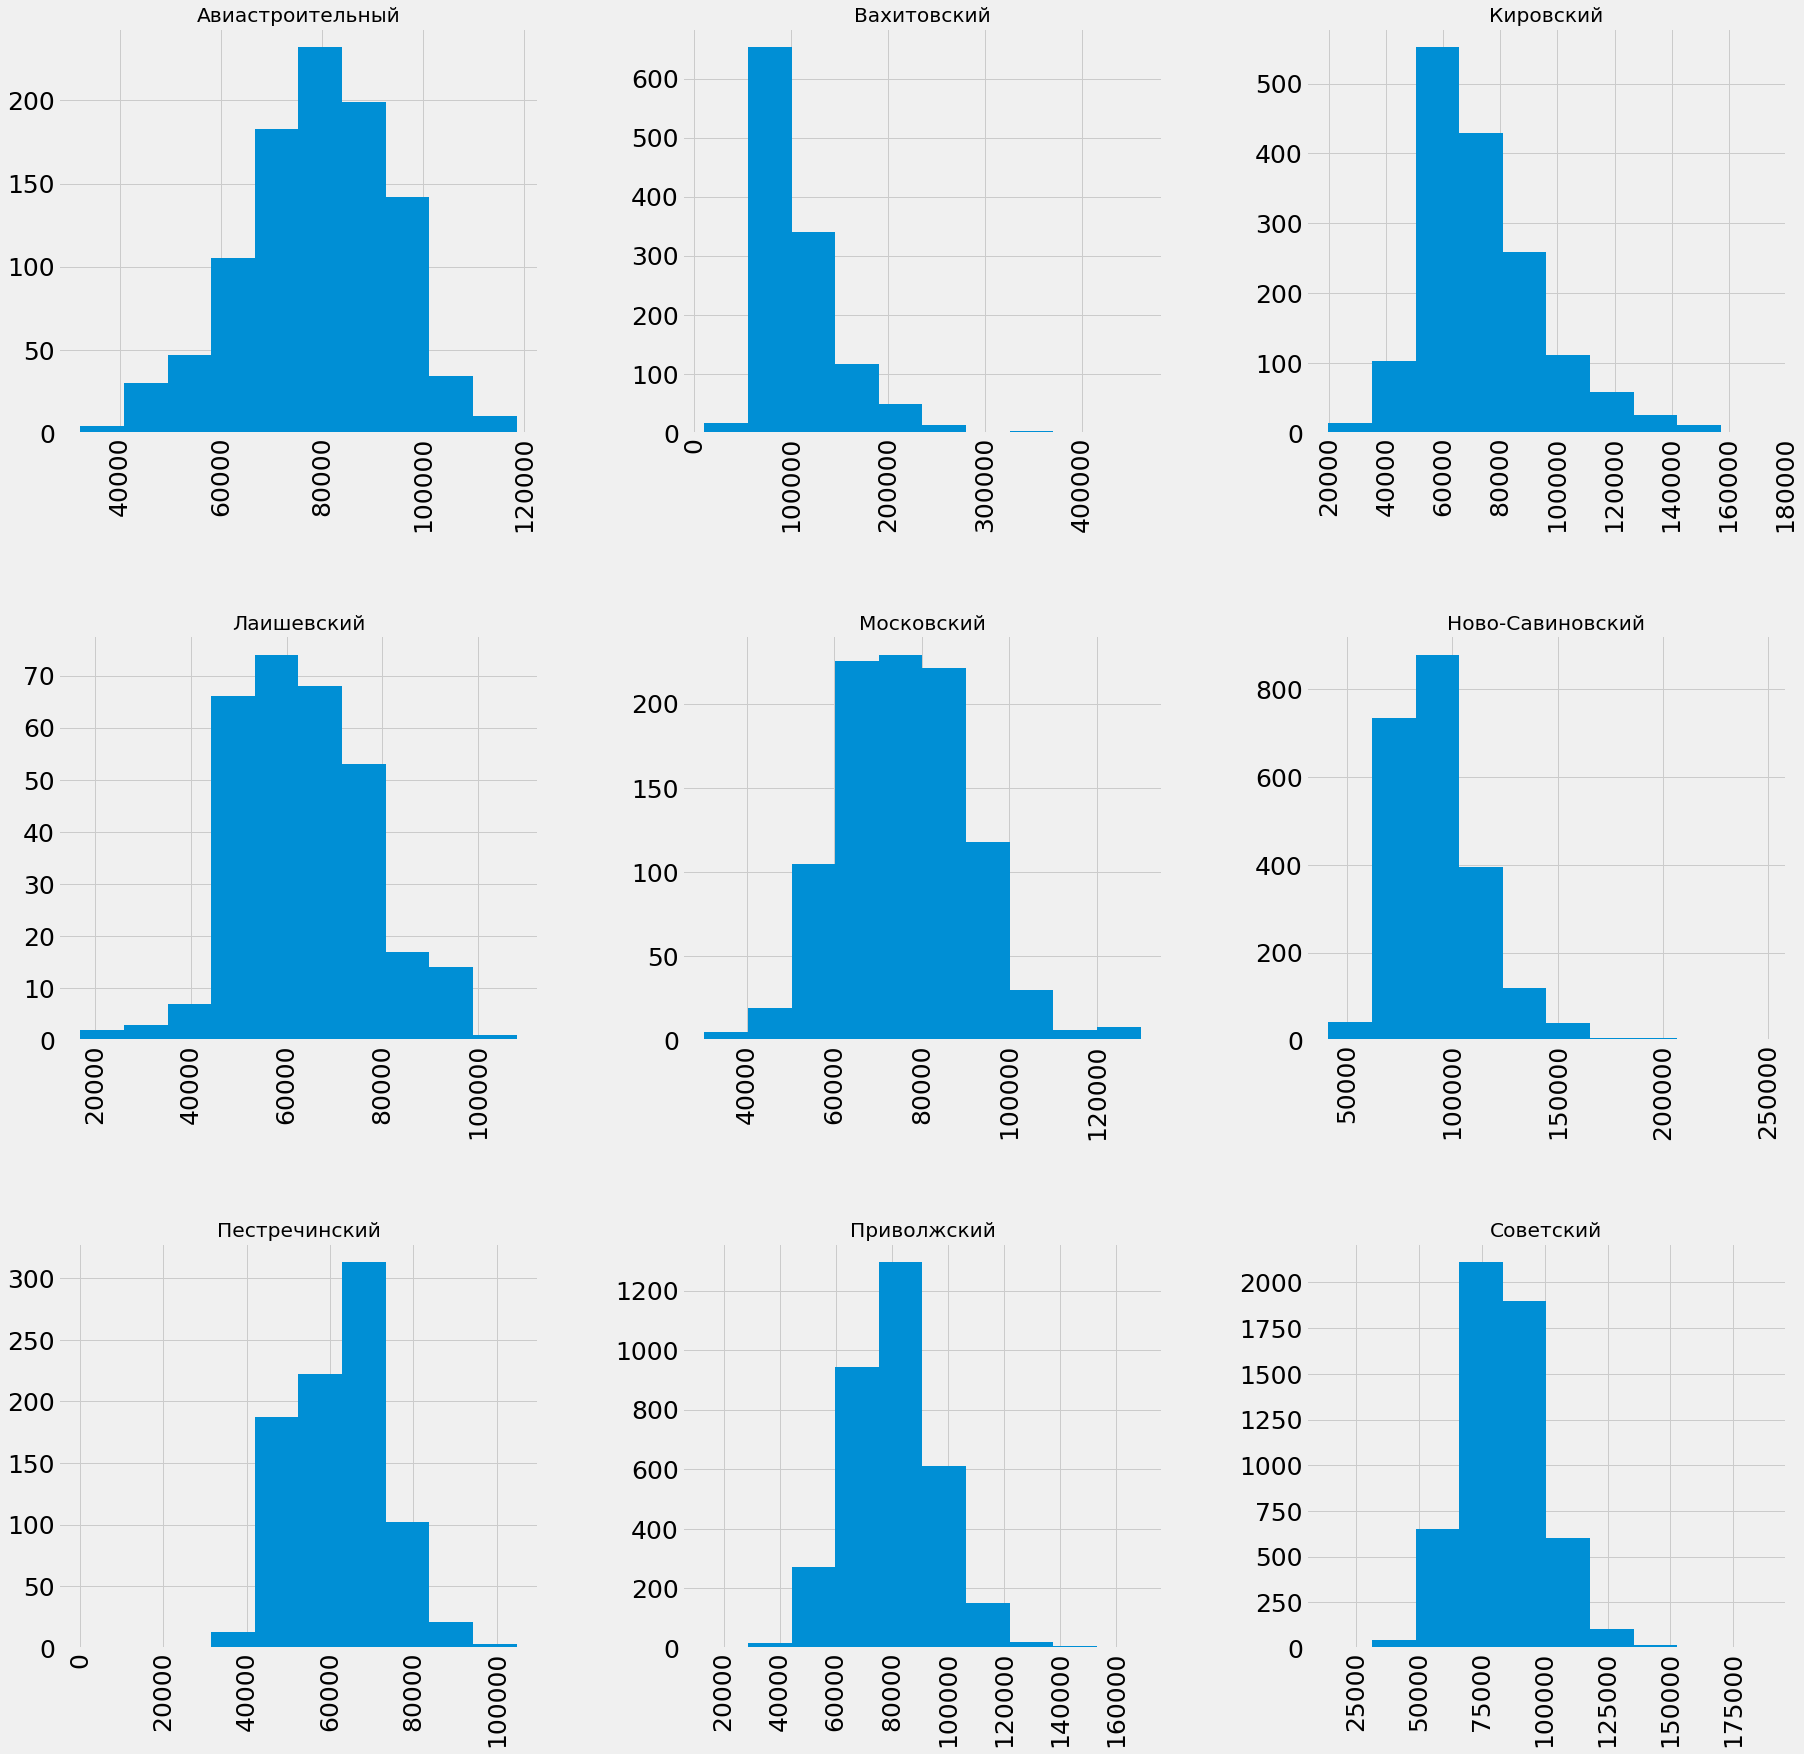

In [7]:
df_relevant.hist('Цена за кв.метр',by='Район',figsize=(30,30),xlabelsize=25,ylabelsize=25)

Text(0.5, 0.98, '')

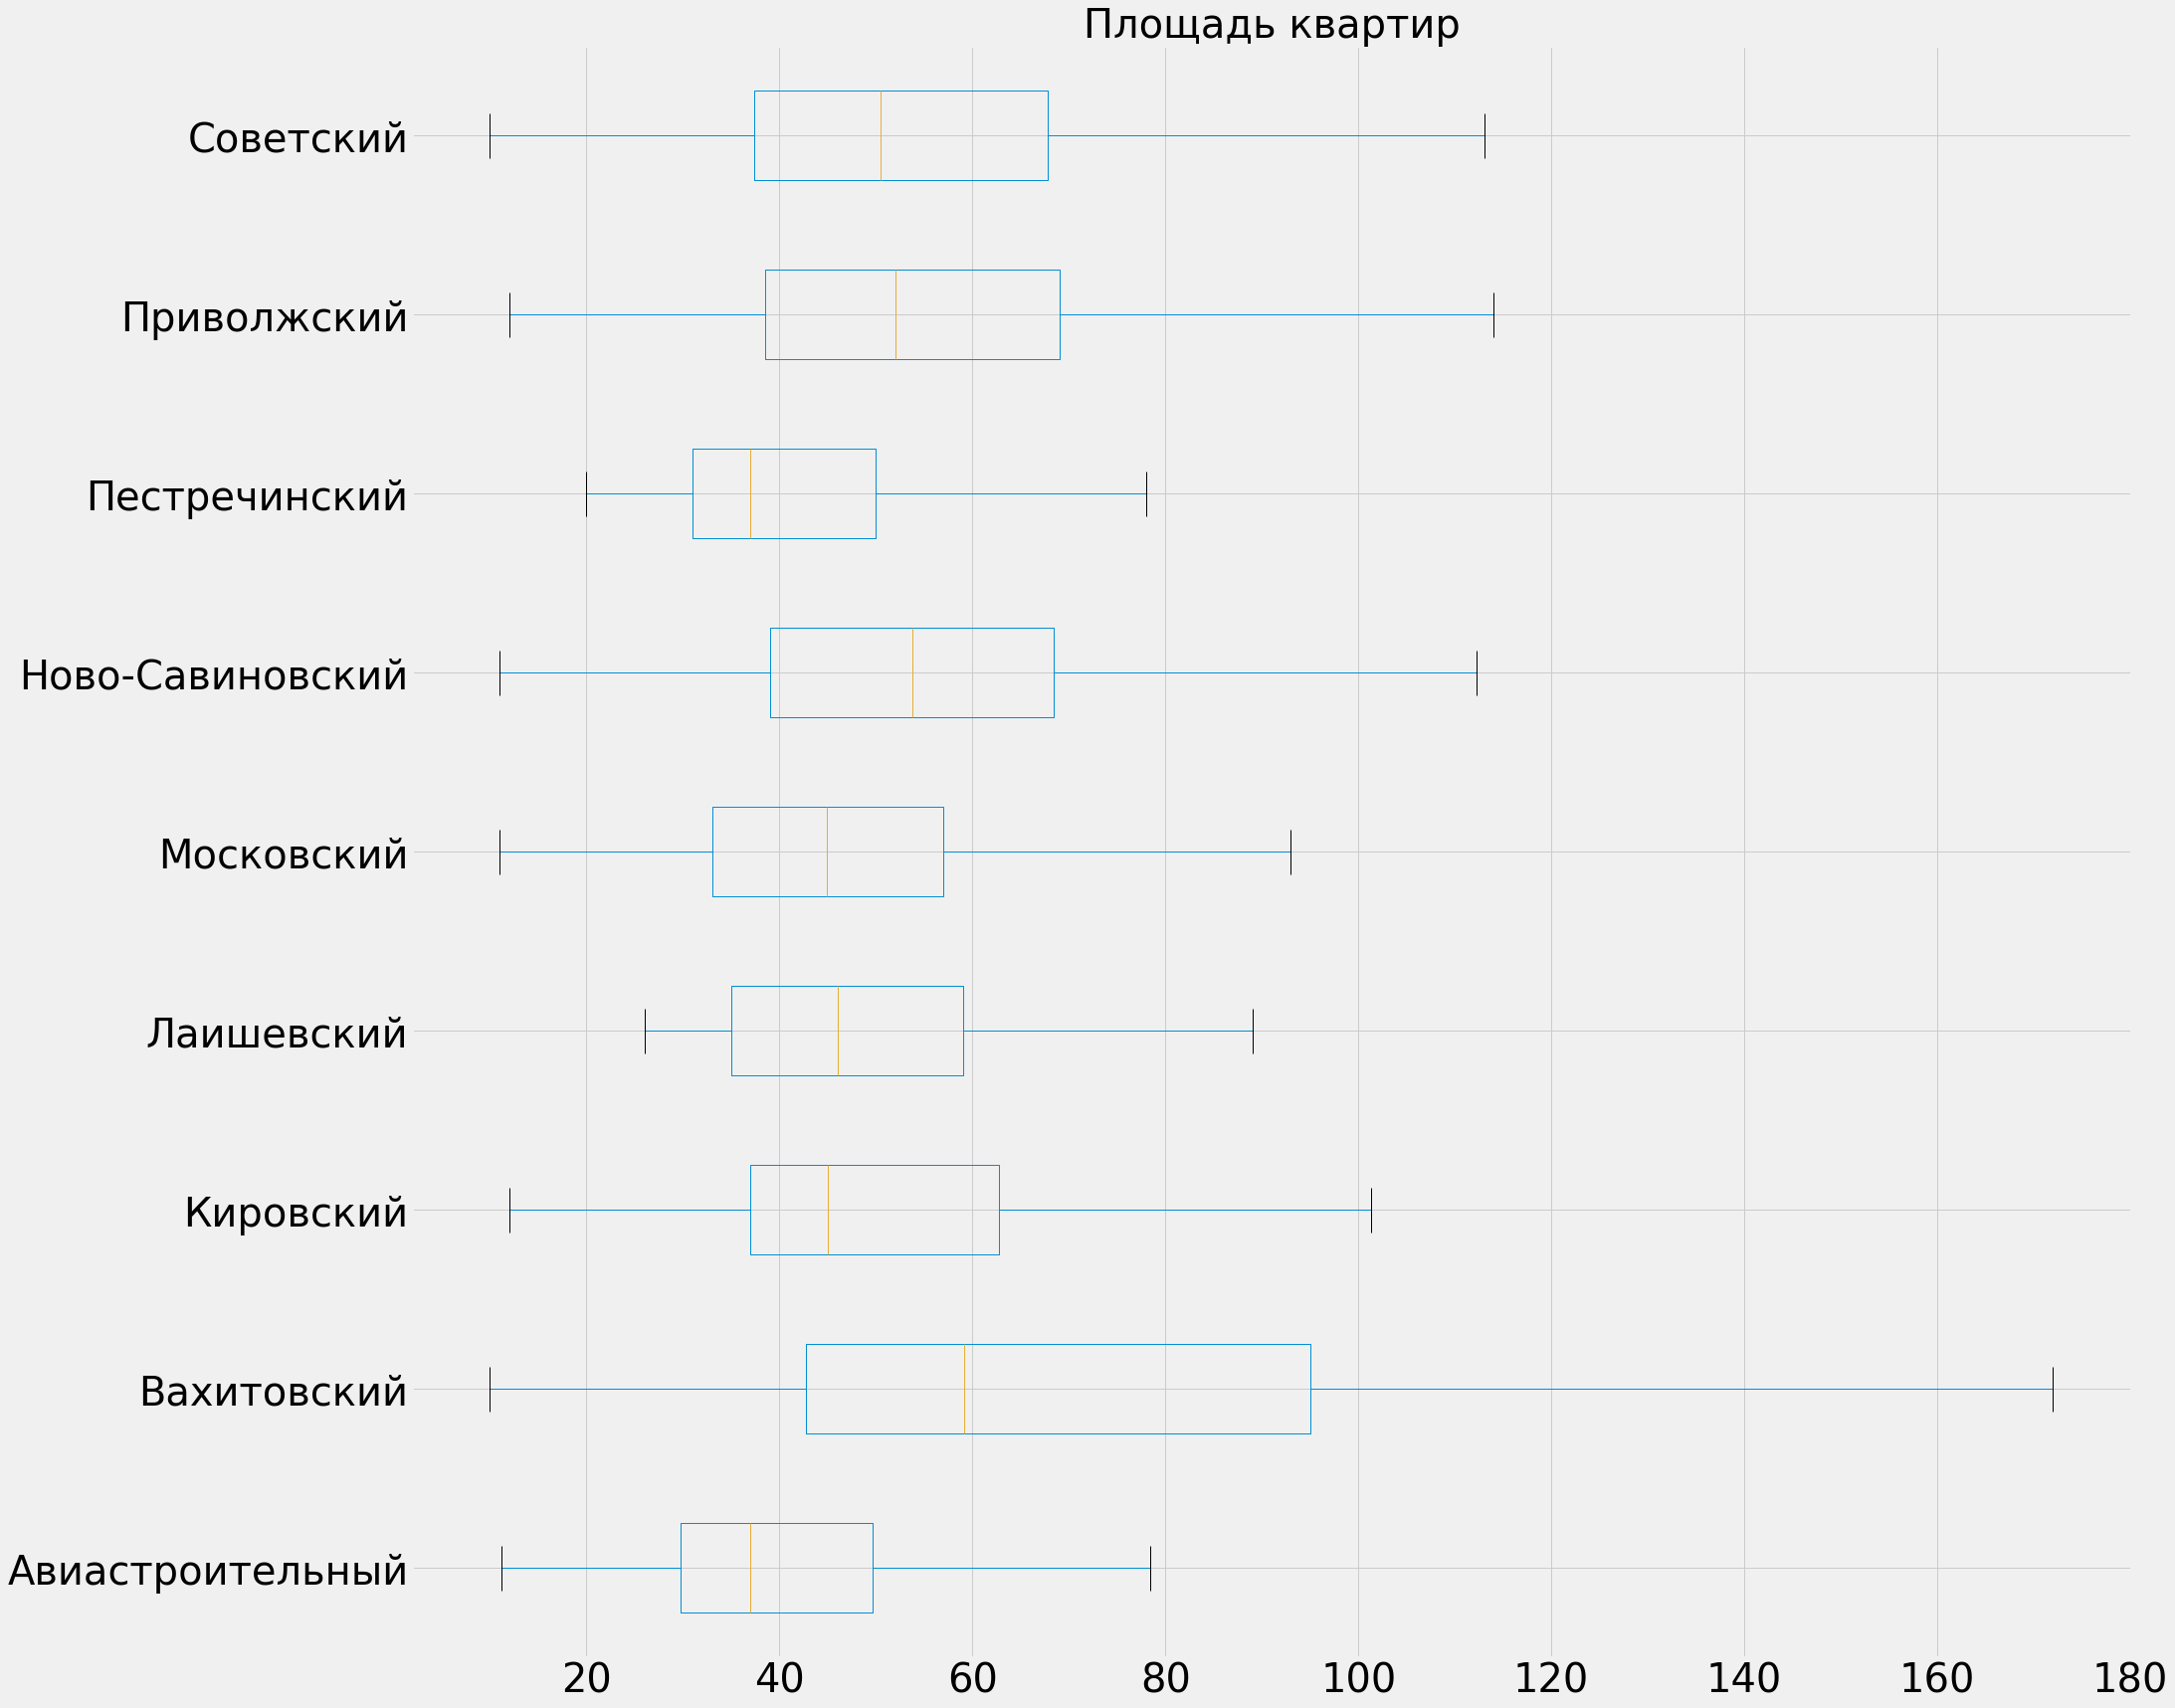

In [12]:
df_relevant.boxplot('Площадь',by='Район',figsize=(30,30),fontsize=40,vert=False,showfliers=False)
plt.title('Площадь квартир',fontsize=40)
plt.xlabel('')
plt.suptitle('')

([], <a list of 0 Text xticklabel objects>)

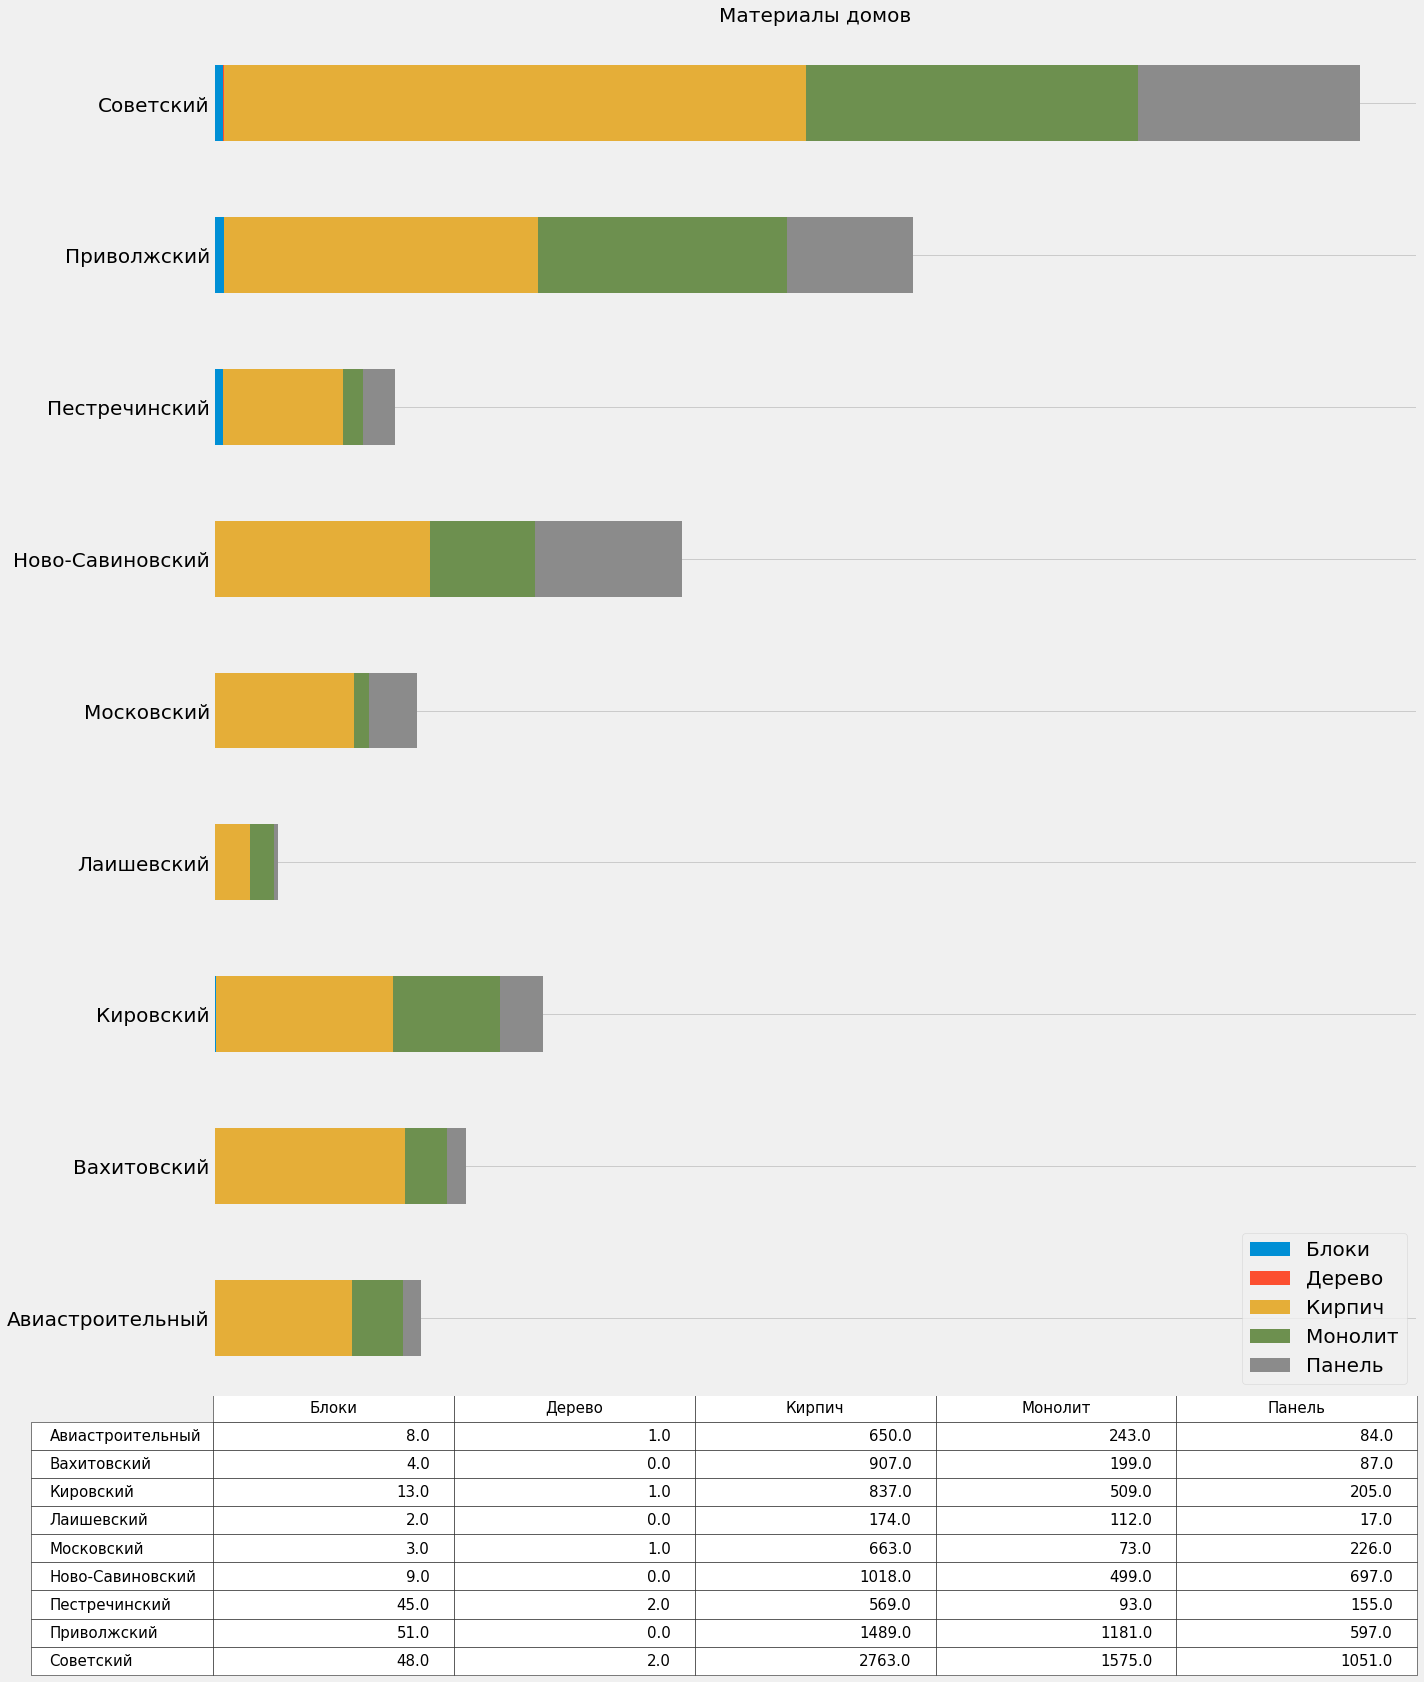

In [87]:
summary=df_relevant.groupby(['Район','Материал']).size().unstack().fillna(0)
summary.plot.barh(stacked=True,figsize=(20,20),fontsize=20)
table=plt.table(cellText=summary.values,
         rowLabels=summary.index,
         colLabels=summary.columns,
        colWidths=[0.2]*5)
table.set_fontsize(15)
table.scale(1,2)
plt.ylabel('')
plt.title('Материалы домов',fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()
plt.xticks([])